# Amath 582 Computational Methods for Data Analysis Winter 2022

## Lecture 1
> Introduction to the course 

### Homework Instructions

\begin{itemize}
\item Title/author/abstract
\item Sec.1 Introduction and Overview
\item Sec.2 Theoretical Background
\item Sec.3 Algorithm Implementation and Development
\item Sec.4 Computational Results
\item Sec.5 Summary and Conclusions
\item Acknowledgment 

<br><br>
Jupyter notebook, LaTex preferred

\end{itemize}


### Review of Basic Concepts from Stats & Probability

\begin{itemize}
\item $P(X=x_j)=P_j$<br> 
$X:\Omega \quad\rightarrow \quad${$x_1,x_2,...,x_n$}


<br><br>
$\mathbb{E}(X):=\sum_{j=1}^n P_j x_j\\$
$Var(X):=E([x-E(x)]^2).$

\item $\sigma:\mathbb{R^d} \rightarrow \mathbb{R}$ is a probability density function (pdf) for the r.v. $X$  

$P(X\in A)=\int_{\mathbb{R^d}}\sigma (x)\,dx,$ for any open set $A \subseteq\mathbb{R^d}$

$\mathbb{E}(X):=\int_{\mathbb{R^d}}x\sigma (x)\, dx) \\$ 
$Cov(X):=\int_{\mathbb{R^d}}(x-\mathbb{E}(X))\sigma (x)\\,dx \equiv Var(X)$

\item independent events: given sets $A,B \subset \mathbb{R^d}$ we have
$$P(X\in A \;and\; Y\in B)=P(X\in A)P(Y \in B)$$ examples, flip two coins.<br>
If two events are independent, then 
$$\mathbb{E}(X^TY)=\mathbb{E}(X)^T\mathbb{E}(Y)$$

\begin{align}
Cov(X,Y):& =\mathbb{E}[(X-\mathbb{E}(X))(Y-\mathbb{E}(Y))^T]\\
& =\mathbb{E}[XY^T-\mathbb{E}(X)Y^T-X\mathbb{E}(Y)^T+\mathbb{E}(X)\mathbb{E}(Y)^T]\\
& = \mathbb{E}(XY^T)-2\mathbb{E}(X)\mathbb{E}(Y)^T+\mathbb{E}(X)\mathbb{E}(Y)^T\\
& = \mathbb{E}(XY^T)-\mathbb{E}(X)\mathbb{E}(Y)^T
\end{align}

if two events are independent, $Cov(X,Y)=0$ (the inverse isn't true)

\end{itemize}


## Lecture 2 
 
>Signal Processing with Discrete Fourier Transform

### Fourier Transform on real line:



Given $f:\mathbb{R} \quad \rightarrow \quad \mathbb{R}$ we define its Fourier Transform 

$$\mathcal{F}(f)\equiv \hat{f}(k):=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty f(x)e^{-ikx}\,dx$$
& inverse FT for $g: \mathbb{R} \quad \rightarrow \quad \mathbb{C} $

$$\mathcal{F}^{-1}(g)\equiv \hat{g}(x):=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty g(k)e^{ikx}\,dk$$

The fact that $\mathcal{F}^{-1}(\mathcal{F}(f))=f$ is a consequence of the Fourier integral theorem. 

### FT Properties

\begin{itemize}
\item Linearity
\item Shifts/Translations $(\widehat{f(x-x_0)})_k=e^{-ikx_0}\hat{f}_k$
\item Differentiation:
$(\widehat{f^{(n)}})_k=(ik)^n\hat{f}_k$
\item Integration:
$\int_0^{2\pi}f(x)\,dx=\hat{f}_0$
\item Convolution: $f,g$ periodic on $[0,2\pi]$
$(f\ast g)(x):=\int_0^{2\pi}f(x-y)g(y)\,dy\\$
$(\widehat{f\ast g})_k=2\pi \hat{f}_k\hat{g}_k$
\end{itemize}


## Lecture 3

Recall FS:

$f: [0,2L] \rightarrow \mathbb{R}, C_R:=\frac{1}{2L}\int_0^{2L}f(x)exp(-\frac{iRkx}{L})\,dx$

$f(k)=\sum_{k=-\infty}^\infty exp(\frac{iRkx}{L}), C_R\in \mathbb{C} $

### FFT examples:

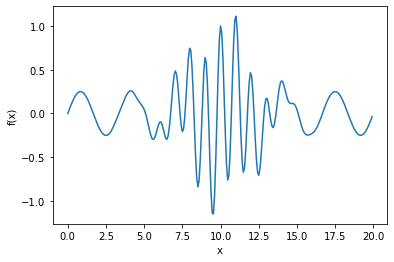

In [12]:
import numpy as np
import matplotlib.pyplot as plt


def f(x,sig,k1,k2,L):
    val=np.exp(-x**2/(2*sig**2))*np.cos(k1*x*np.pi/L)+0.25*np.sin(k2*x*np.pi/L) 
    return val
L=10
N_grid=2**8
xx=np.linspace(0,2*L,N_grid+1)
xx=xx[:-1]
s=2
k1,k2=20,6

ff=f(xx-L,s,k1,k2,L)


plt.plot(xx,ff)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


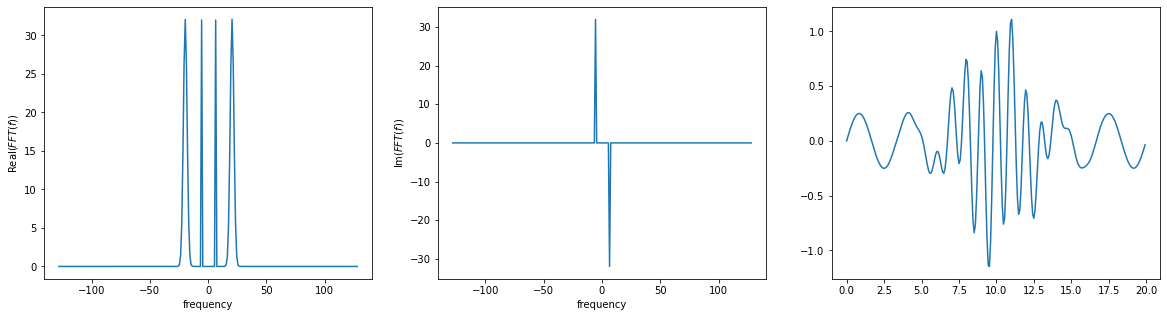

In [16]:
f_fft=np.fft.fft(ff)
f_fft=np.fft.fftshift(f_fft)
n=np.linspace(-N_grid/2,N_grid/2,N_grid)

fig,(ax0,ax1,ax2)=plt.subplots(1,3, figsize=(20,5))

ax0.plot(n,np.abs(f_fft))
ax0.set_xlabel('frequency')
ax0.set_ylabel('Real($FFT(f)$)')

ax1.plot(n,f_fft.imag)
ax1.set_xlabel('frequency')
ax1.set_ylabel('Im($FFT(f)$)')

ff_i=np.fft.ifft(np.fft.fftshift(f_fft))
ax2.plot(xx,ff_i.real)
plt.show()



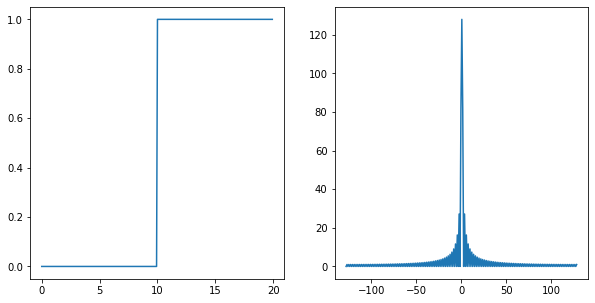

In [3]:
def g(x,L):
    return (x>=L)
f1=g(xx,L)
ff1=np.fft.fftshift(np.fft.fft(f1))

fig1,(ax0,ax1)=plt.subplots(1,2,figsize=(10,5))
ax0.plot(xx,f1)
ax1.plot(n,np.abs(ff1))

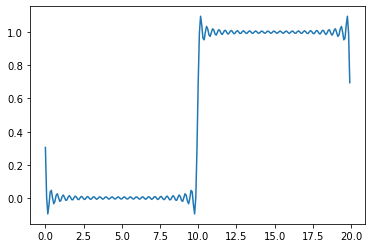

In [9]:
filter=(np.abs(n)<=50)

filter.astype(float)
ff1_clean=np.fft.ifft(np.fft.fftshift(filter*ff1))
plt.plot(xx,ff1_clean.real)

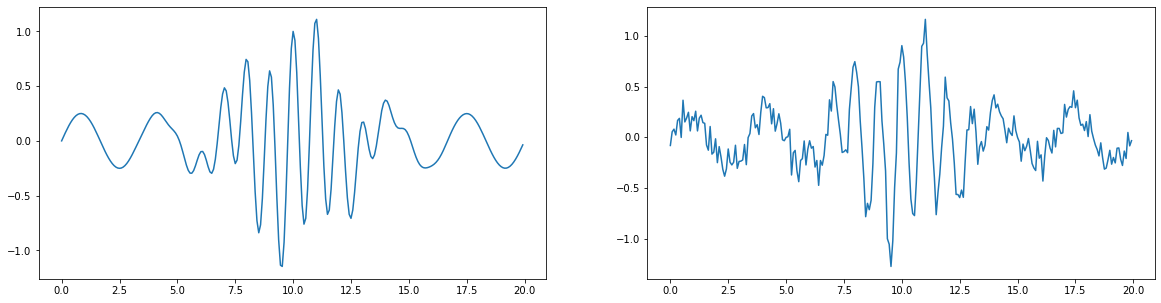

In [5]:
ff_noise=ff+0.1*np.random.randn(N_grid)
fig2,(ax0,ax1)=plt.subplots(1,2,figsize=(20,5))

ax0.plot(xx,ff)
ax1.plot(xx,ff_noise)


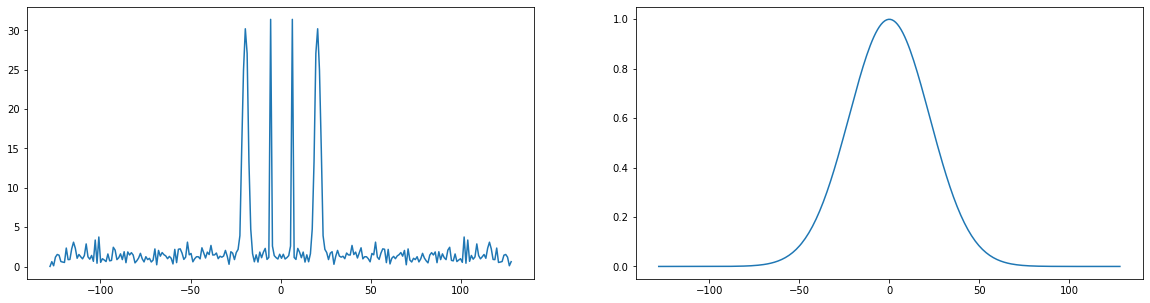

In [6]:
ff_noise_hat=np.fft.fftshift(np.fft.fft(ff_noise))
fig,(ax0,ax1)=plt.subplots(1,2, figsize=(20,5))
gaussian_filter=np.exp(-0.001*n**2)
ax0.plot(n,np.abs(ff_noise_hat))
ax1.plot(n,gaussian_filter)

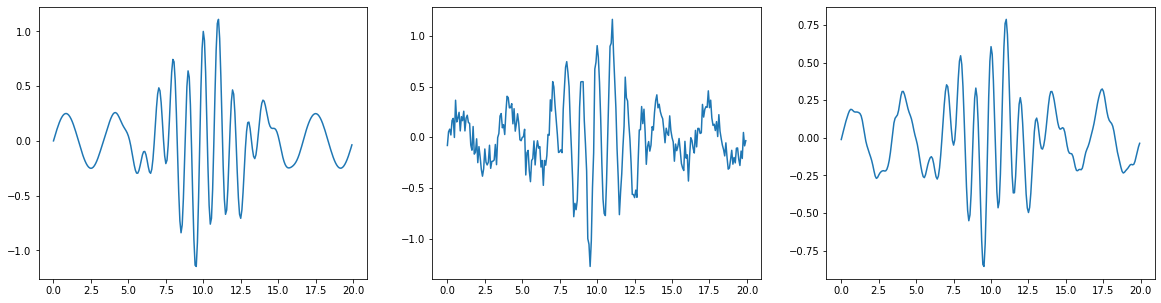

In [8]:
ff_clean=np.fft.ifft(np.fft.ifftshift(ff_noise_hat*gaussian_filter))

fig,(ax0,ax1,ax2)=plt.subplots(1,3, figsize=(20,5))
ax0.plot(xx,ff)
ax1.plot(xx,ff_noise)
ax2.plot(xx,ff_clean.real)


## Lecture 4

### STFT (Short Time Fourier Transform)



The idea is applying a shifted Gaussian filter to the original signal to retrieve a piece of the signal at specific time span.(Localization) 

Thus, after Fourier Transform we get frequency information about only that time span. The STFT is defined as:

$$C[f](\tau,k)=\int_0^{2\pi}f(t)g(t-\tau)exp(-ikt)\,dt$$

Originally, Deres Gabor suggested $g$ filter to be Gaussian,

$$g(t)=\frac{1}{\sqrt{\pi\sigma^2}}exp(-\frac{t^2}{2\sigma^2}).$$

But one can pick his/her own localization filter. This process is then called STFT, or some call it Gabor Transform. We do need to impose requirements on g:

\begin{itemize}
\item $g$ is real & symmetric
\item $||g||_{L^2}=(\int_{-\infty}^\infty|g(t)|^2\,dt)^{\frac{1}{2}}=1, \;||g(-\tau)||_{L^2}=1, \forall\, \tau \in \mathbb{R}$
\end{itemize}

Provided these two requirements, we have that

(a) STFT is linear 

(b) $f(t)=\frac{1}{2\pi}\int_{-\infty}^\infty \int_{-\infty}^\infty C[f](\tau,k)g(t-\tau)exp(ikt)\,dtdk$

Consider the discrete frequencies and grid in time, 
$k = m \delta k$, $\tau = n \delta t$.
Then the discrete Gabor Transform on $[0,2L]$:
$$G[f](m,n)=\frac{1}{2L}\int_0^{2L}f(t)g(t-n\delta t)exp(-i\pi\frac{m \delta k t}{L})\,dt$$

Limitations:

The width of g matters. If width too small the information contained is too tiny, if too big the information is noisy.-- Uncertainty principle tells us we cannot get precise time & frequency at the same time.

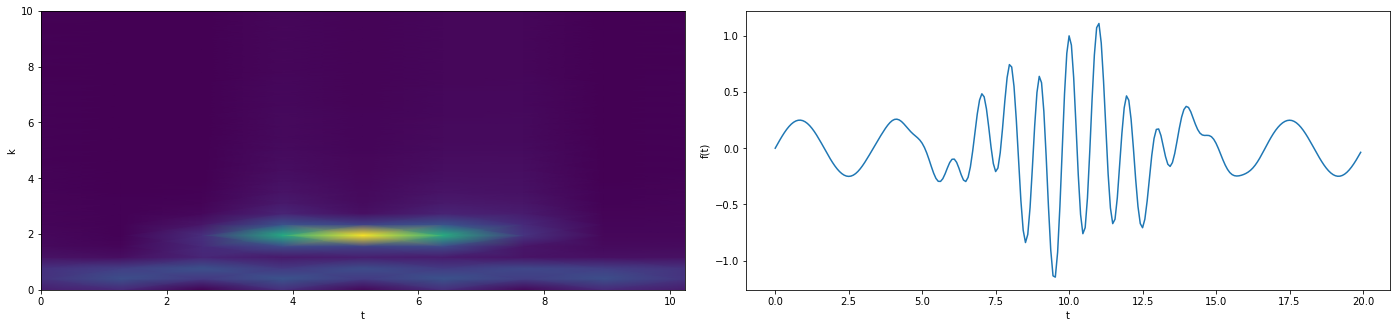

In [22]:
import scipy.signal as spsg
sigma =2 
window_fun=("gaussian", int(sigma/L*N_grid)) #gaussian filter with standard deviation sigma

sampling_freq= int(N_grid/L) # how many samples in unit time
number_of_time_seg=4

kk,tt,zz= spsg.stft(ff, sampling_freq,window=window_fun,nperseg=N_grid/number_of_time_seg)

fig,ax=plt.subplots(1,2,figsize=(20,5))

fig.tight_layout(pad=3.0)

ax[0].pcolormesh(tt,kk,np.abs(zz),shading='gouraud')
ax[0].set_xlabel('t')
ax[0].set_ylabel('k')
ax[0].set_ylim(0,10)

ax[1].plot(xx,ff)
ax[1].set_xlabel('t')
ax[1].set_ylabel('f(t)')

plt.show()

## Lecture 5
### Wavelet Transform

Fourier Transform computes $f(t)$ projecting on $exp(-i\frac{\pi kt}{L})$, which is non-localized. Gabor computes $f(t)g(t-\tau)$  projecting on $exp(-i\frac{\pi kt}{L})$, which is localized.


Consider a function $\psi : \mathbb{R} \to \mathbb{R}$ along with its translation/dilation:

$$\Psi(t)=
\begin{cases}
+1 & t\in [-0.5,0] \\
-1 & t\in [0,0.5]\\
0 & else
\end{cases}
$$

$$\Psi_{a,b}(t):=\frac{1}{\sqrt{a}}\psi(\frac{t-b}{a})$$

a for dilation, b for shift. As a increases, the wavelet is doing differentiation, corresponding to higher frequency.  The Continuous Wavelet Transform (CWT) can be derived in a familiar manner:

$$W_\Psi[f](a,b):=\int_{-\infty}^\infty f(t)\Psi_{a,b}(t)\,dt$$

CWT is:

\begin{itemize}
\item Linear: \$ W\[mf+ng](a,b)=mW\[f](a,b)+nW\[g](a,b) $
\item Translation (define $T_cf(t)=f(t-c) $):
$W\[T_cf](a,b)=W\[f](a,b-c)$
\item Dilation (define $D_cf(t)=\frac{1}{c}f(\frac{t}{c})$):
$W\[D_cf](a,b)=\frac{1}{\sqrt{c}}W\[f](\frac{a}{c},\frac{b}{c})$   
\item Inversion (only one not easily shown):
$f(t)=\frac{1}{C_\Psi}\int_{-\infty}^\infty\int_{-\infty}^\infty W_\Psi\[f](a,b)\\,dadb$, 
where $C_\Psi:=\int_{-\infty}^\infty\frac{|\hat{\Psi}(k)|^2}{|k|}\\, da db$

We say $\Psi$ is an admissible wavelet if $C_\Psi <+\infty$


\end{itemize}

Many standard wavelets exist in software packages ( Pywavelets package). Take constant $a_0,b_0$ & integers $m,n \ge0$ then write 

$$\Psi_{m,n}(t)=a_0^{-m/2}\Psi(a_0^{-m}t-nb_0)$$

then the DWT is defined as 

$$W[f](m,n):=\int_{-\infty}^\infty f(t)\Psi_{m,n}(t)\,dt$$


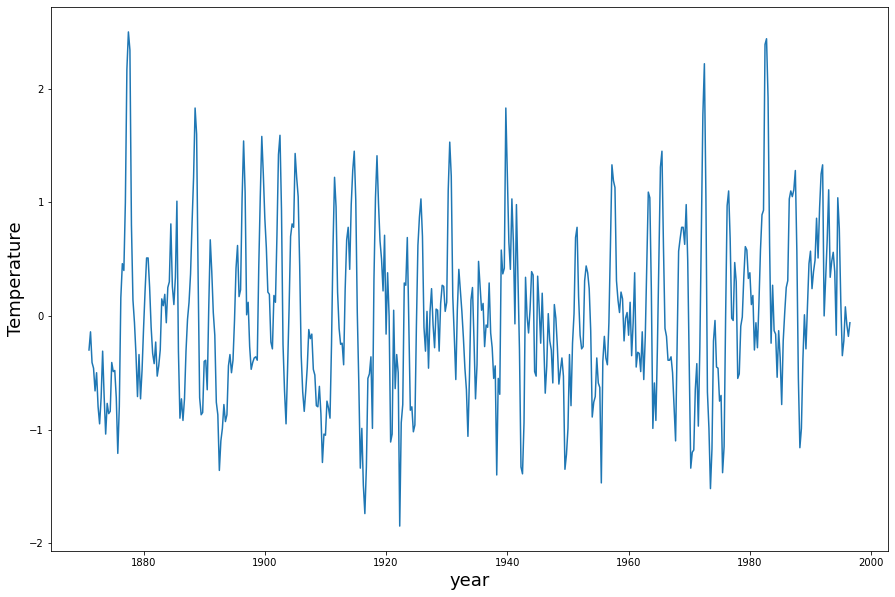

In [30]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt


dataset="https://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
df_nino=pd.read_table(dataset)
N=df_nino.shape[0]
t0=1871
dt=0.25
time=np.arange(0,N)*dt+t0
data=df_nino.values.squeeze()

fig,ax=plt.subplots(figsize=(15,10))

ax.plot(time,data)
ax.set_xlabel('year',fontsize=18)
ax.set_ylabel('Temperature', fontsize=18)
plt.show()

In [ ]:
scales=np.arange(1,128)
[wc,freq]=pywt.cwt(data,scales,'gaus1',dt)
power=wc**2
period=1./freq

levels=[0.0625,0.125,0.25,0.5,1,2,4,8]
contourlevels=np.log2(levels)

fig,ax=plt.subplots(figsize=(15,10))

im=ax.contourf(time,np.log2(period),np.log2(power),contourlevels,extend='both')

ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('Period (Years)',fontsize=18)
ax.set_title('Power Spectrum of Wavelet Transform',fontsize=20)

yticks=2**np.arange(np.ceil(np.log2(period.min())),np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(yticks))
ax.set_yticklabels(yticks)

cbar_ax=fig.add_axes([0.95, 0.5, 0.03, 0.25])
fig.colorbar(im,cax=cbar_ax,orientation='vertical')
plt.show()

## Lecture 6
### Multi-Resolution Analysis with Wavelet Bases

Most common convention briefly:

$a= 2^{-m}, \;\; b= n2^{-m}$, integers $-\infty<m,n<\infty$
\begin{align}
\Psi_{m,n}&=2^{\frac{m}{2}}\Psi(\frac{t-n2^{-m}}{2^{-m}})\\
&=2^{\frac{m}{2}}\Psi(2^mt-n)
\end{align}

In order for the DWT to be more useful, the reconstructed formula needs $\Psi_{m,n}$ to be orthogonal. So,

$$\int_{-\infty}^{\infty}\Psi_{m,n}(t)\Psi_{k,l}(t)\,dt = \delta_{mk}\delta_{nl}$$

Let's unpack this a bit:

(i) Normalization in $L^2$

(ii)$\int_{-\infty}^{\infty}\Psi_{m,n}(t)\Psi_{m,n+n'}(t)\,dt =0$  for $n'\ne 0$ --> Translated wavelets are orthogonal

(iii)$\int_{-\infty}^{\infty}\Psi_{m,n}(t)\Psi_{m+m',n}(t)\,dt =0$ for $m'\ne 0$ --> Wavelets at different scales are orthogonal

    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt 
from copy import deepcopy

# same function from Lec 4

def f(x):
  val = 0.75*( (3*np.sin(2*x) + 0.5*np.tanh(0.5*(x-3)) + 0.2*np.exp(-(x- 4)**2)
  + 1.5*np.sin(5*x) + 4*np.cos(3*(x-6)**2))/10 + (x/20)**3 ) + np.cos(np.pi*x) + 4*np.exp( - ( (x - 7)/0.05)**2)

  return val


L = 12
N_grid = 2**10

grid = np.linspace(0, L, N_grid+1)
grid = grid[0:N_grid]

f_vals = f(grid)

# plotting f

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(grid, f_vals)

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)


ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('f(t)', fontsize=18)

plt.show()

In [ ]:
n_scales = 6

f_prev_scale = f_vals
f_next_scale = f_vals

new_grid = grid

fig, ax = plt.subplots(n_scales, 1, figsize=(10, n_scales*5))

for i in range(n_scales):

  f_prev_scale = f_next_scale

  f_next_scale, wf = pywt.dwt( f_prev_scale, wavelet = 'haar'  )

  new_grid = new_grid[0::2]

  ax[i].plot(new_grid, f_next_scale)

  ax[i].tick_params(axis='x', labelsize=18)
  ax[i].tick_params(axis='y', labelsize=18)

  ax[i].set_ylabel('Scale : 2**' + str(int(np.log2(N_grid)-i-1)) , fontsize= 18)
  
ax[n_scales-1].set_xlabel('t', fontsize= 18)


Thus the DWT allows us to write 

$$f(t)=\sum_{m=-\infty}^{\infty}\sum_{m=-\infty}^{\infty}c_{m,n}\Psi_{m,n}(t)$$

$$c_{m,n}=\int_{-\infty}^{\infty}f(t)\Psi_{m,n}(t)\,dt$$

On an interval $[a,b]$, just becomes $c_{m,n}=\int_{a}^{b}f(t)\Psi_{m,n}(t)\,dt$

Note that on the boundaries, one has to decide what to do with out-the-range function. eg: assume periodicity



### Some theory for Multi-Resolution analysis

Recall that $L^2(\mathbb{R})$ space of functions 

$$L^2(\mathbb{R}):=\left\{ f:\mathbb{R} \to \mathbb{R} | \int_{\mathbb{R}}|f(t)|^2\,dt <+\infty\right\} $$

which is an inner product (Hilbert) space with inner product 

$$f,g \in L^2(\mathbb{R}), (f,g):=\int_{-\infty}^{\infty}f(t)g(t)\,dt,$$

with norm of $f$ : $||f||_{L^2(\mathbb{R})}=(f,f)$. Subspace of $L^2(\mathbb{R})$ denotes $\{ V_m : m$ - integer $\}$, and coarse subspace belongs to finer subspace.

(i) Union of $V_m$ is $L^2(\mathbb{R})$ (diversity)
$$\bigcup_{m=-\infty}^{\infty}V_m = L^2(\mathbb{R})$$

(ii) Intersections are empty (Scales are separate) 

$$\bigcap_{m=-\infty}^{\infty}V_m = \emptyset$$

(iii) Each subspace picks up a certain resolution 

$$f(t) \in V_m \,, \;\;\text{ if & only if } f(2x) \in V_{m+1}$$

(iv) $V_0$ is relatively scaled,

$$\text{ for any } f \in V_0 \text { we have } f(t)=\int_{-\infty}^\infty c_n\phi_{0,n}(t).$$

$\phi$ is called the scaling function or father wavelet.
